In [148]:
import pandas as pd
import numpy as np
from sklearn.datasets.samples_generator import make_blobs
import matplotlib.pyplot as plt
from matplotlib import style
from sklearn.preprocessing import StandardScaler

class dbScan:
    
    
    def __init__(self, data, eps=2, minPts=2):
        self.data = data
        self.eps = eps
        self.minPts = minPts
        self.labels_ = []
    
    def euclidean(self, feature_one, feature_two):
        distance = 0
        
        if (len(feature_one) != len(feature_two)):
            return -1
            
        for i in range(len(feature_one)):
            distance += (feature_one[i] - feature_two[i]) ** 2
        
        ed = np.sqrt(distance)
        return ed
    
    # Fit the data by determining which label points fits the criteria
    def fit(self):
        labels = [0] * len(self.data)
        
        current = 0
        
        for point in range(0, len(self.data)):
            # Check if the label has been visited or not
            if not (labels[point] == 0):
                continue
            
            # Get the current neighbors of the point
            neighbors = self.region(point)
            
            # If the current point has less than the minimum number of points require, set to -1 to discard
            if len(neighbors) < self.minPts:
                print('Labels[{}] is noise'.format(point))
                labels[point] = -1
            # Else if there are more, start expanding the cluster
            else:
                current += 1
                self.cluster(labels, neighbors, current, point)
        self.labels_ = labels
            
    # Expand the clusters, checking to make sure that the point has more neighbors than minPts
    def cluster(self, labels, neighbors, current, point):
        # Set the current point ID 
        labels[point] = current
        
        for i in range(0, len(neighbors)):
            # Get the next point
            nextPoint = neighbors[i]
            
            # if the point is a noise
            if labels[nextPoint] == -1:
                next
              
            # Else, if the label hasn't been visited, then check if the next point has enough min points
            elif labels[nextPoint] == 0:
                labels[nextPoint] = current
                nextNeighbors = self.region(nextPoint)
                
                if len(nextNeighbors) >= self.minPts:
                    neighbors += nextNeighbors
                
    # Figure out all of the neighbors around point, given the distance is less than the eps
    def region(self, point):
        neighbors = []
        # Compare data from point passed in with every point in the dataset, checking if the distance is within the eps
        for i in range(0, len(self.data)):
            if self.euclidean(self.data[point], self.data[i]) < self.eps:
                neighbors.append(i)
        return neighbors
    
    def predict(self):
        if self.labels_ == None:
            print("Error: Data has not be fitted. Use the function 'db.fit()' to fit the data before predicting.")
            return None
        return self.labels_
    
    def num_clusters(self):
        return max(self.labels_)

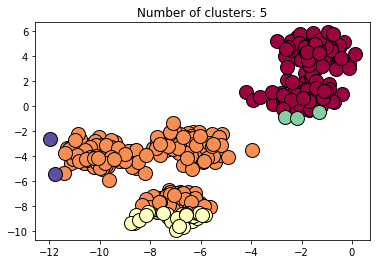

In [175]:
def main():
    centers = [[1, 1], [-1, -1]]
    x, y = make_blobs(n_samples=500, centers=5, cluster_std=.7, random_state=1)
    db = dbScan(x, eps=5, minPts=30)
    db.fit()
    unique_labels = set(db.labels_)
    colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
    for k, col in zip(unique_labels, colors):
        # If k is -1, then use black for noise
        if k == -1: 
            col = [0, 0, 0, 1]
            
        members = []
        for i in range(0, len(db.labels_)):
            if db.labels_[i] == k:
                members.append(i)
        
        for point in members:
            plt.plot(x[point][0], x[point][1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=14)
    
    plt.title('Number of clusters: {}'.format(max(db.labels_)))
    plt.show()


if __name__ == "__main__":
    main()